In [60]:
import random
import numpy as np
import matplotlib.pyplot as plt


# Utility functions
def sigmoid(x, k, x0):
    return 1 / (1 + np.exp(-k * (x - x0)))

def average_altruism_probability(population):
    return sum(individual.altruism_probability() for individual in population) / len(population)


# Individual
class Individual:
    def __init__(self, payoff_altruism, payoff_defect):
        self.payoff_altruism = payoff_altruism
        self.payoff_defect = payoff_defect
        #self.lollipop_benefit = 1
        self.lollipops_received = 0
        self.neighbors = list()
        
    def altruism_probability(self):
        delta_pi = self.payoff_altruism - self.payoff_defect + self.lollipops_received # * self.lollipop_benefit
        return sigmoid(delta_pi, 1, 0)


def run_iteration(population):
    for individual in population:
                altruism_probability = individual.altruism_probability()
                for neighbor in individual.neighbors:
                    if altruism_probability > random.random():
                        neighbor.lollipops_received += 1

# Simulation
def run_simulation(population_size, iterations, maximum_number_neighbors, payoff_altruism, payoff_defect):
    # contains generations + 1 averages (because it includes the initial average too)
    average_altruism_probabilities = list()
    # Set up simulation
    population = [Individual(payoff_altruism, payoff_defect) for _ in range(population_size)]
    for individual in population:
        # number of neighbors chosen UAR between 1 and maximum_number_neighbors
        individual.neighbors = random.sample(population, random.randint(1, maximum_number_neighbors))  
        # prohibit an individual from being their own neighbor
        if individual in individual.neighbors:
            individual.neighbors.remove(individual)
    average_altruism_probabilities.append(average_altruism_probability(population))

    # Run simulation 
    if iterations != None:
        for _ in range(iterations):
            run_iteration(population)
            average_altruism_probabilities.append(average_altruism_probability(population))
        return average_altruism_probabilities
    else:
        iterations = 0
        # max out at 100 iterations
        while average_altruism_probability(population) < 0.95 and iterations < 100:
            run_iteration(population)
            iterations += 1
        return iterations

In [61]:
""" 
payoff_altruism_values =  [-1, -3, -5]
payoff_defect_values = [1, 3, 5]

fig, axes = plt.subplots(len(payoff_altruism_values), len(payoff_defect_values), figsize=(10, 10))

for i, payoff_altruism in enumerate(payoff_altruism_values):
    for j, payoff_defect in enumerate(payoff_defect_values):
        average_altruism_probabilities = run_simulation(population_size=50, 
                                                        iterations=50, 
                                                        maximum_number_neighbors=10, 
                                                        payoff_altruism=payoff_altruism, 
                                                        payoff_defect=payoff_defect)

        # Plot results in corresponding subplot
        ax = axes[i][j]
        ax.plot(average_altruism_probabilities)
        ax.set_title(f'Altruism Payoff: {payoff_altruism}, Defect payoff: {payoff_defect}')
        ax.set_xlabel('Generation')
        ax.set_ylabel('Average Altruism Probability')
        ax.set_ylim(0, 1.001)
        

plt.tight_layout()
plt.show()
 """

" \npayoff_altruism_values =  [-1, -3, -5]\npayoff_defect_values = [1, 3, 5]\n\nfig, axes = plt.subplots(len(payoff_altruism_values), len(payoff_defect_values), figsize=(10, 10))\n\nfor i, payoff_altruism in enumerate(payoff_altruism_values):\n    for j, payoff_defect in enumerate(payoff_defect_values):\n        average_altruism_probabilities = run_simulation(population_size=50, \n                                                        iterations=50, \n                                                        maximum_number_neighbors=10, \n                                                        payoff_altruism=payoff_altruism, \n                                                        payoff_defect=payoff_defect)\n\n        # Plot results in corresponding subplot\n        ax = axes[i][j]\n        ax.plot(average_altruism_probabilities)\n        ax.set_title(f'Altruism Payoff: {payoff_altruism}, Defect payoff: {payoff_defect}')\n        ax.set_xlabel('Generation')\n        ax.set_ylabel('A

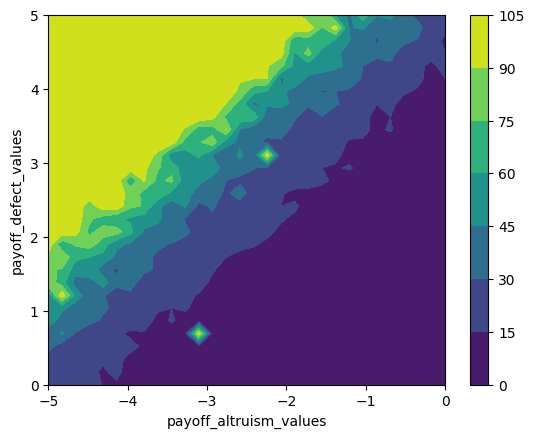

In [62]:

payoff_altruism_values = np.linspace(-5, 0, 30)
payoff_defect_values = np.linspace(0, 5, 30)
X, Y = np.meshgrid(payoff_altruism_values, payoff_defect_values)

iterations = np.zeros_like(X) 

for i in range(iterations.shape[0]):
    for j in range(iterations.shape[1]):
        iterations[i, j] = run_simulation(population_size=50, 
                                iterations=None, 
                                maximum_number_neighbors=10, 
                                payoff_altruism=X[i, j], 
                                payoff_defect=Y[i, j])
        

plt.figure()
plt.contourf(X, Y, iterations)
plt.colorbar()
plt.xlabel('Payoff Altruism Values')
plt.ylabel('Payoff Defect Values')
plt.show()


